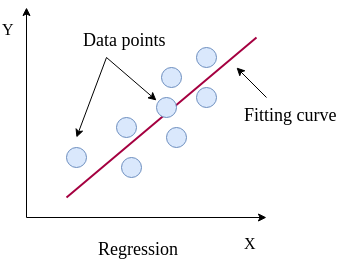

In [29]:
from IPython.display import Image

Image(filename='image/regression.png')

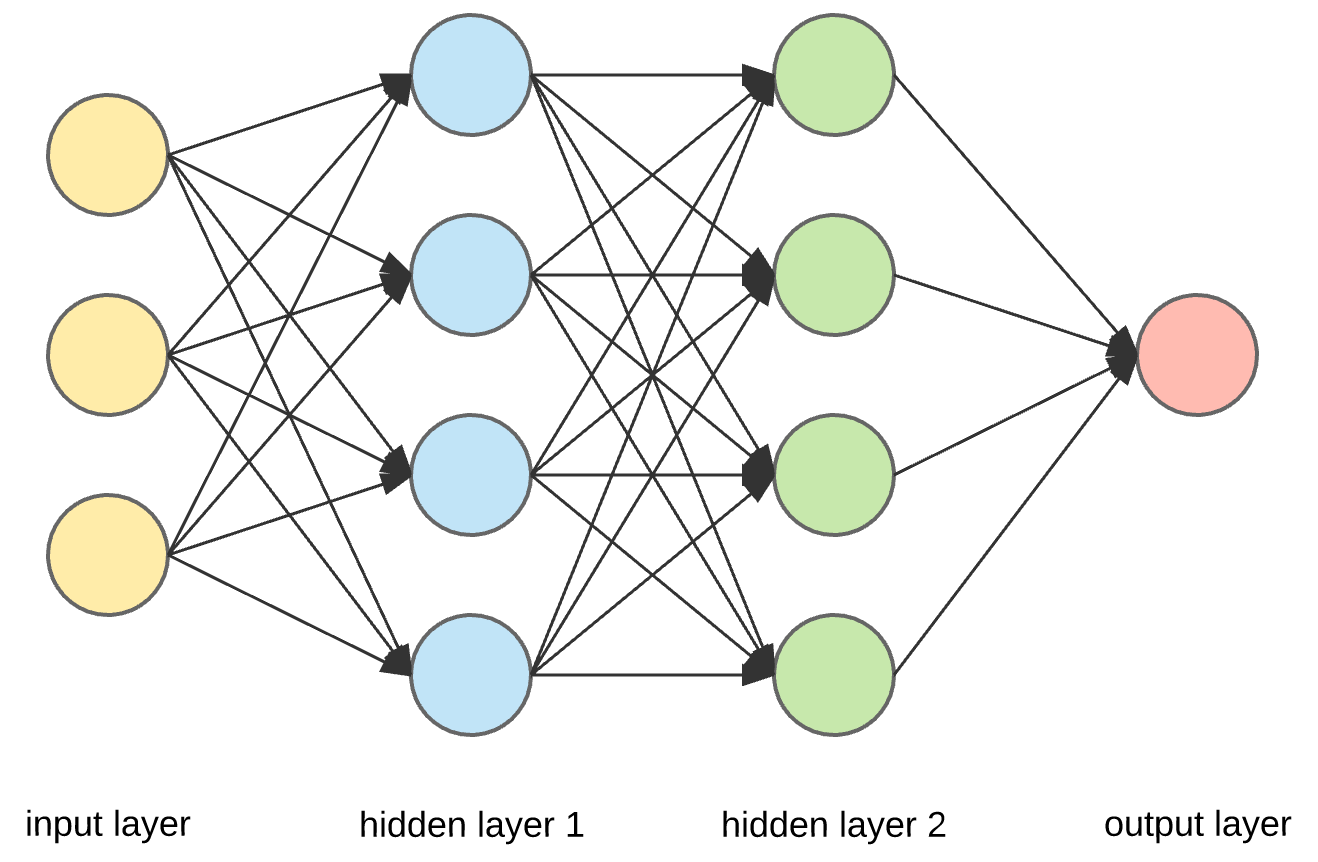

In [30]:
Image(filename='image/nn.png') 

In [3]:
"""
Regression on Protein Tertiary Structure using deep learning (Keras)
"""

# Data source: http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4321859/
# http://www.mecs-press.org/ijmsc/ijmsc-v2-n2/IJMSC-V2-N2-3.pdf

import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings("ignore")

def extract_data(path):
    data_frame = pd.read_csv(path, sep=",")
    return data_frame

def create_features_target(data_frame):
    target = data_frame[["RMSD"]]
    features = data_frame.drop("RMSD", axis=1)
    return features, target

d_frame = extract_data("data/casp_regression.csv")
data_features, data_target = create_features_target(d_frame)
data_features = data_features
print("Complete data")
print(d_frame.shape)
print()
print("Features")
print(data_features.shape)
print()
print("Target")
print(data_target.shape)

Complete data
(45730, 10)

Features
(45730, 9)

Target
(45730, 1)


In [4]:
d_frame

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


In [5]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split


# divide the entire dataset into training and test sets
# learn on training set and evaluate the trained model on test set
test_size = 0.33
data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, 
    data_target, test_size=test_size, random_state=42)

# shapes of the datasets
print("Size of training set")
print(data_features_train.shape)
print(data_target_train.shape)
print()
print("Size of test set")
print(data_features_test.shape)
print(data_target_test.shape)

Size of training set
(30639, 9)
(30639, 1)

Size of test set
(15091, 9)
(15091, 1)


In [24]:
# Define a neural network using Keras deep learning library and optimize its parameter using Hyperopt
# https://keras.io/
# https://github.com/hyperopt/hyperopt/wiki/FMin

from keras.models import Sequential, Model
from keras.layers.core import Dropout, Activation, Dense
from keras.layers import Input
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, Callback
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# set dimensions
input_dimensions = data_features_train.shape[1]

# maximum number of epochs per sample evaluation
n_epochs = 10

# type of error function
loss_type = 'mean_squared_error'

# maxinum number of evaluation of sampled configurations
max_evals = 30

# set initial ranges for parameters for hyperparameter optimisation
# number of iterations within one epoch = #_training_samples / batch_size
batch_size = [30, 300] # https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

# output function for each layer
hidden_activation = ['tanh', 'relu', 'elu'] # https://keras.io/activations/
# https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02

# number of neurons for each layer
hidden_units = [20, 300]
# https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

def create_model(params):
    
    # https://keras.io/getting-started/sequential-model-guide/
    # create network
    # input layer
    inputs = Input(shape=(input_dimensions,))
    
    # first hidden layer
    x = Dense(int(params["hidden_units"]), activation=params["hidden_activation"])(inputs)
    
    # dropout layer to avoid overfitting
    x = Dropout(params["dropout"])(x)
    
    # second dense layer
    x = Dense(int(params["hidden_units"]), activation=params["hidden_activation"])(x)
    
    # dropout layer to avoid overfitting
    x = Dropout(params["dropout"])(x)
    
    # output dense layer
    predictions = Dense(1, activation='linear')(x)
    
    # assign the inputs and output to the model
    model = Model(inputs=inputs, outputs=predictions)
    
    # create an optimizer object
    optimizer = RMSprop(lr=params["learning_rate"])
    
    # add optimizer and loss type to the model and compile it
    model.compile(optimizer=optimizer, loss=loss_type)
    
    print("==================================================================================")
    print("New model configuration")
    print("==================================================================================")
    
    model.summary()
    
    # stop training iteration as the error stops dropping
    # https://keras.io/callbacks/#callback
    # https://keras.io/callbacks/#earlystopping
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=2, min_delta=1e-4)
    
    # train the model using the training data and compute error on validation data
    model_fit = model.fit(data_features_train, data_target_train,
                          validation_data=(data_features_test, data_target_test),
                          epochs=n_epochs,
                          verbose=2,
                          batch_size=int(params["batch_size"]),
                          callbacks=[early_stopping])
    
    # predict on test data using trained model
    prediction = model.predict(data_features_test)
    
    # compute error between true values and predicted values
    mse = mean_squared_error(prediction, data_target_test)
    print("Mean squared error: %0.4f" % mse)
    
    return {'loss': mse, 'status': STATUS_OK}

# https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a
# set the search space of parameters
hyper_params = {
    "batch_size": hp.quniform("batch_size", batch_size[0], batch_size[1], 1),
    "hidden_units": hp.quniform("hidden_units", hidden_units[0], hidden_units[1], 1),
    "learning_rate": hp.loguniform("learning_rate", np.log(1e-4), np.log(1e-2)),
    "hidden_activation": hp.choice("hidden_activation", hidden_activation),
    "dropout": hp.uniform("dropout", 0.0, 0.5)
}

# store information about trial for sampling configuration
trials = Trials()

# Hyperopt software paper and usage
# # https://conference.scipy.org/proceedings/scipy2013/pdfs/bergstra_hyperopt.pdf
# https://optunity.readthedocs.io/en/latest/user/solvers/TPE.html
# https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce
# http://fastml.com/optimizing-hyperparams-with-hyperopt/
# https://medium.com/vooban-ai/hyperopt-tutorial-for-optimizing-neural-networks-hyperparameters-e3102814b919

# get the best parameter configuration
best_parameters = fmin(create_model, hyper_params, trials=trials, algo=tpe.suggest, max_evals=max_evals)

best_model_params = dict()
for item in best_parameters:
    item_val = best_parameters[item]
    if item == 'hidden_activation':
        best_model_params[item] = hidden_activation[item_val]
    else:
        best_model_params[item] = item_val
print(best_model_params)

New model configuration                             
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 107)               1070      
_________________________________________________________________
dropout_17 (Dropout)         (None, 107)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 107)               11556     
_________________________________________________________________
dropout_18 (Dropout)         (None, 107)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 108       
Total params: 12,734                                
Trainable params: 12,734            

 - 2s - loss: 5788035578.9420 - val_loss: 6611765633.0433                  

Epoch 2/10                                                                 
 - 1s - loss: 604626381521.7363 - val_loss: 556049027884.3602              

Epoch 3/10                                                                 
 - 1s - loss: 5430602382264.5781 - val_loss: 8608015515096.4736            

Mean squared error: 8608015595851.5078                                     
New model configuration                                                    
_________________________________________________________________          
Layer (type)                 Output Shape              Param #             
input_16 (InputLayer)        (None, 9)                 0                   
_________________________________________________________________          
dense_46 (Dense)             (None, 45)                450                 
_________________________________________________________________          
dropout_3

Layer (type)                 Output Shape              Param #               
input_22 (InputLayer)        (None, 9)                 0                     
_________________________________________________________________            
dense_64 (Dense)             (None, 130)               1300                  
_________________________________________________________________            
dropout_43 (Dropout)         (None, 130)               0                     
_________________________________________________________________            
dense_65 (Dense)             (None, 130)               17030                 
_________________________________________________________________            
dropout_44 (Dropout)         (None, 130)               0                     
_________________________________________________________________            
dense_66 (Dense)             (None, 1)                 131                   
Total params: 18,461                                            

Epoch 3/10                                                                    
 - 2s - loss: 38.4155 - val_loss: 38.3767                                     

Epoch 4/10                                                                    
 - 2s - loss: 38.4427 - val_loss: 40.3920                                     

Epoch 5/10                                                                    
 - 2s - loss: 38.3495 - val_loss: 37.5733                                     

Epoch 6/10                                                                    
 - 2s - loss: 38.4168 - val_loss: 40.8297                                     

Epoch 7/10                                                                    
 - 2s - loss: 38.4315 - val_loss: 40.4016                                     

Mean squared error: 40.4016                                                   
New model configuration                                                       
_______________________________________________

_________________________________________________________________             
dropout_65 (Dropout)         (None, 151)               0                      
_________________________________________________________________             
dense_98 (Dense)             (None, 151)               22952                  
_________________________________________________________________             
dropout_66 (Dropout)         (None, 151)               0                      
_________________________________________________________________             
dense_99 (Dense)             (None, 1)                 152                    
Total params: 24,614                                                          
Trainable params: 24,614                                                      
Non-trainable params: 0                                                       
_________________________________________________________________             
Train on 30639 samples, validate on 15091 samples   

In [31]:
# Plot the optimization results

f_size = 18

bs_val = list()
hu_val = list()
lr_val = list()
do_val = list()
loss_val = list()

def get_configurations():
    
    bs = [t['misc']['vals']['batch_size'] for t in trials.trials]
    hu = [t['misc']['vals']['hidden_units'] for t in trials.trials]
    lr = [t['misc']['vals']['learning_rate'] for t in trials.trials]
    do = [t['misc']['vals']['dropout'] for t in trials.trials]
    loss = [t['result']['loss'] for t in trials.trials if t['result']['loss']]
    ticks = ["Batch size", "Hidden units", "Learning rate", "Dropout", "MSE loss"]
    
    for idx, item in enumerate(loss):
        if item < 10000:
            loss_val.append(item)
            bs_val.append(bs[idx][0])
            hu_val.append(hu[idx][0])
            lr_val.append(lr[idx][0])
            do_val.append(do[idx][0])
    mat = [bs_val, hu_val, lr_val, do_val, loss_val]

get_configurations()

In [32]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


init_notebook_mode(connected=True)

data = [
    go.Parcoords(
        line = dict(color = 'red', showscale = True),
        dimensions = list([
            dict(label = 'Batch size', values = bs_val),
            dict(label = 'Hidden units', values = hu_val),
            dict(label = 'Learning rate', values = lr_val),
            dict(label = 'Dropout', values = do_val),
            dict(label = 'MSE loss', values = loss_val),
        ])
    )
]

iplot(data, filename = 'dl_coordinate_plot')